In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
import h5py
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
print("tf.__version__",tf.__version__)

tf.__version__ 2.11.0


In [8]:
# data
corrfile = r'all_IllustrisLH_corfuncs.h5'
f = h5py.File(corrfile, 'r')
#looking to see data in cataloge
# def print_dataset_name(name,g):
#     print(name,'&',g)
# f.visititems(print_dataset_name)
corrfuncs = []
missing=[]
for filenum in range(1000):
    try:
        simcorfunc = f[f'simulation{filenum}/corrfunc'][:]
        corrfuncs.append(simcorfunc)
    except:
        print("no LH",filenum)
        missing.append(filenum)
r = f['simulation0/bins'][:]
# close file
f.close()
# labels
# Read the file
file_path = 'params_LH_IllustrisTNG.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data_list = []
for line in lines:
    values = line.strip().split()  # Split by whitespace and remove leading/trailing spaces
    float_values = [float(val) for val in values]  # Convert strings to floats
    data_list.append(float_values)

# Convert the list to a numpy array
label_table = np.array(data_list)
label_table[:,2:] = np.log(label_table[:,2:])
#print(label_table[:10])

no LH 45
no LH 145
no LH 169
no LH 183
no LH 447
no LH 503
no LH 539
no LH 719
no LH 747
no LH 801
no LH 888
no LH 964


In [9]:
corrfuncs1 = np.array(corrfuncs)
print("data shape",corrfuncs1.shape)
# Remove the missing rows
rmvd_label_table = np.delete(label_table, missing, axis=0)
# Duplicate each row to create a new array size (988,45,6)
raw_labels = np.repeat(rmvd_label_table[:, np.newaxis, :], 45, axis=1)
print("raw labels shape", raw_labels.shape)

# Get the number of samples (dimension along the first axis)
num_samples = corrfuncs1.shape[0]
# Generate a random permutation of indices
random_indices = np.random.permutation(num_samples)
# Shuffle both arrays using the same permutation
corrfuncs1 = corrfuncs1[random_indices]
raw_labels = raw_labels[random_indices]

print(raw_labels[:10,0,:])

print("alternative training")
corrfuncs2=np.reshape(corrfuncs1, (corrfuncs1.shape[0]*corrfuncs1.shape[1],corrfuncs1.shape[2]))
labels2 = np.reshape(raw_labels, (raw_labels.shape[0]*raw_labels.shape[1],raw_labels.shape[2]))
print(corrfuncs2.shape)
print(labels2.shape)

data shape (988, 45, 8)
raw labels shape (988, 45, 6)
[[ 0.401       0.6594      0.82484627 -1.17697391 -0.2585376  -0.13516702]
 [ 0.399       0.9306      0.53095173 -1.20470641 -0.46510365 -0.43321664]
 [ 0.1534      0.6386     -0.98010951  0.21210687 -0.55798711 -0.4720377 ]
 [ 0.4814      0.6994     -0.50600393 -1.34607415 -0.20170011 -0.23636811]
 [ 0.129       0.7678     -0.9828847   0.01525308  0.35419988  0.22942776]
 [ 0.3102      0.7682     -1.20470641  1.36827295  0.11159504  0.09773451]
 [ 0.2098      0.8198      0.66403243 -1.3377709  -0.45539092 -0.21141263]
 [ 0.3662      0.825      -0.65571653 -0.65571653  0.08802919  0.00900929]
 [ 0.1642      0.9026     -1.37105113  1.3072755   0.46510415 -0.50530754]
 [ 0.1602      0.7174      1.27123137 -0.15665381 -0.09912444 -0.67305048]]
alternative training
(44460, 8)
(44460, 6)


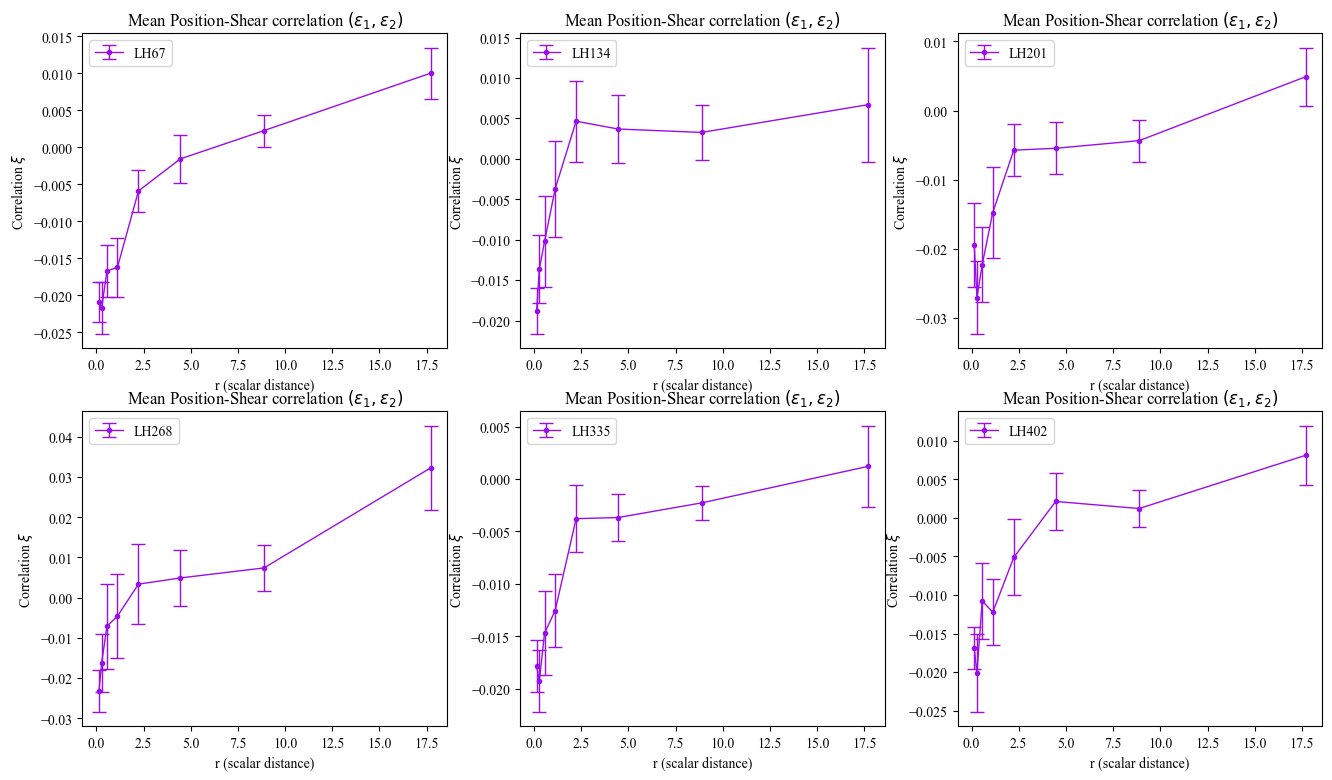

In [10]:
fig, ax = plt.subplots(2, 3,figsize=(16, 9))
k=0
for i in range(2):
    for j in range(3):
        sim_mean = np.mean(corrfuncs1[k],axis=0)
        sim_stderr = np.std(corrfuncs1[k],axis=0)/np.sqrt(45)
        k+=67
        ax[i,j].errorbar(r,sim_mean,sim_stderr,color='xkcd:violet',lw=1,
             label=f'LH{k}',capsize=5, elinewidth = 1, fmt = '.-')
        #ax[i,j].set_ylim([-0.035,0.01])
        ax[i,j].set_xlabel(r'r (scalar distance)')
        ax[i,j].set_ylabel(r'Correlation $\xi$')
        ax[i,j].set_title('Mean Position-Shear correlation $(\epsilon_1,\epsilon_2)$')
        ax[i,j].legend()

In [11]:
mean_labels = np.mean(labels2,axis=0)
std_labels = np.std(labels2,axis=0)
print(mean_labels)
print(std_labels)
bootstr_labels_n = (labels2-mean_labels) / (5*std_labels)  + 0.5# mean of 0.5, std of 0.2
#print(bootstr_labels_n[:10])
mean_data = np.mean(corrfuncs2,axis=0)
std_data = np.std(corrfuncs2,axis=0)
#print(mean_data, std_data)
bootstr_data_n = (corrfuncs2-mean_data)/(std_data*3)
print(bootstr_data_n[:5])
print()

[ 3.02034008e-01  8.00725506e-01 -9.91742821e-03  1.59947277e-03
 -1.34415724e-03  3.74668998e-04]
[0.11464383 0.11555868 0.79892977 0.79841586 0.39992226 0.40067984]
[[-0.12795505 -0.02130033 -0.00680483  0.08390777  0.09559564  0.39959361
   0.22427943 -0.08715732]
 [-0.41182284 -0.33814894 -0.0554634  -0.01921389  0.05161493 -0.10227039
  -0.2922491  -0.33732548]
 [-0.17774511  0.23490315  0.20526832  0.26019709  0.17333294  0.17842581
   0.32025028  0.07855268]
 [-0.02345579 -0.10280427 -0.49790695 -0.04602735 -0.33249876  0.02285864
   0.23290878  0.39658267]
 [ 0.05532916  0.19892831  0.23104228 -0.43711963 -0.18017548 -0.41651039
   0.3089482   0.69975236]]



In [33]:
# no shuffleing for testing
train_data, test_data, train_label, test_label = train_test_split(bootstr_data_n, bootstr_labels_n, test_size = 0.1, random_state = None,shuffle=True)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size = 0.11, random_state = 6)
print(test_data.shape, test_label.shape)
print(train_data.shape, train_label.shape)
print(val_data.shape, val_label.shape)

(4446, 8) (4446, 6)
(35612, 8) (35612, 6)
(4402, 8) (4402, 6)


#### Build Model

In [78]:
# normalizer = tf.keras.layers.Normalization(axis=-1, input_shape=(8,))
# normalizer.adapt(train_data)
# mean_value = normalizer.mean.numpy()
# variance_value = normalizer.variance.numpy()
# print("Input Normalization Mean:", mean_value)
# print("Input Normalization Variance:", variance_value)

In [89]:
model = keras.models.Sequential()
#model.add(normalizer)
model.add(tf.keras.layers.Dense(50, input_shape=(8,), activation="relu"))

# model.add(tf.keras.layers.BatchNormalization())  # Normalization 1
model.add(tf.keras.layers.Dense(50, activation='relu'))

# model.add(tf.keras.layers.BatchNormalization())  # Normalization 1
model.add(tf.keras.layers.Dense(32, activation='relu'))

# model.add(tf.keras.layers.BatchNormalization())  # Normalization 1
model.add(tf.keras.layers.Dense(8, activation='relu'))


# model.add(tf.keras.layers.BatchNormalization())  # Normalization 3
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4))
model.build()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 50)                450       
                                                                 
 dense_56 (Dense)            (None, 50)                2550      
                                                                 
 dense_57 (Dense)            (None, 32)                1632      
                                                                 
 dense_58 (Dense)            (None, 8)                 264       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,905
Trainable params: 4,905
Non-trainable params: 0
_________________________________________________________________


In [90]:
param=5
pre_test_predict=model.predict(test_data, verbose=1)
history=model.fit(train_data,train_label[:,param],epochs=12,batch_size=32,verbose=1,validation_data=(val_data,val_label[:,param]))

139/139 [==============================] - 0s 2ms/step
Epoch 1/12
1113/1113 [==============================] - 4s 3ms/step - loss: 0.0400 - val_loss: 0.0394
Epoch 2/12
1113/1113 [==============================] - 3s 3ms/step - loss: 0.0400 - val_loss: 0.0394
Epoch 3/12
1113/1113 [==============================] - 3s 2ms/step - loss: 0.0399 - val_loss: 0.0394
Epoch 4/12
1113/1113 [==============================] - 3s 2ms/step - loss: 0.0399 - val_loss: 0.0394
Epoch 5/12
1113/1113 [==============================] - 3s 2ms/step - loss: 0.0399 - val_loss: 0.0394
Epoch 6/12
1113/1113 [==============================] - 3s 2ms/step - loss: 0.0398 - val_loss: 0.0395
Epoch 7/12
1113/1113 [==============================] - 3s 2ms/step - loss: 0.0398 - val_loss: 0.0394
Epoch 8/12
1113/1113 [==============================] - 3s 3ms/step - loss: 0.0398 - val_loss: 0.0395
Epoch 9/12
1113/1113 [==============================] - 3s 2ms/step - loss: 0.0397 - val_loss: 0.0395
Epoch 10/12
1113/1113 [====

End validation loss is: 0.0396


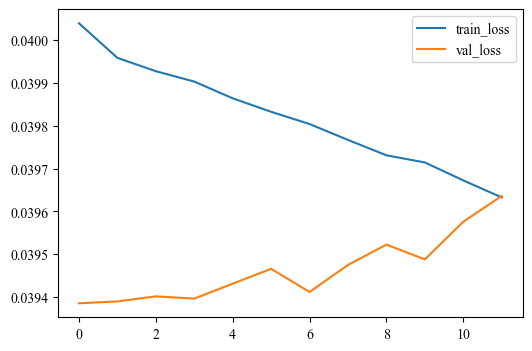

In [91]:
msq=round(history.history['val_loss'][-1],4)
print("End validation loss is:", msq)
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_title = 'Loss of the model'
ax.xlabel = 'Time (Epochs)'
ax.ylabel = 'Loss'
ax.legend()

### Testing the testing data

139/139 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Testing Data for $A_{AGN2}$')

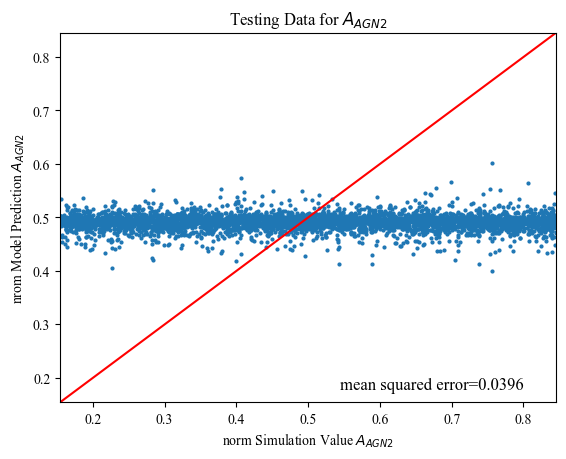

In [92]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{SN2}','A_{AGN1}','A_{AGN2}']
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
test_predict=model.predict(test_data, verbose=1)
plt.plot([0,1],[0,1],c='r')
plt.scatter(test_label[:,param], test_predict,s=4)
plt.text(0.8, 0.2, f'mean squared error={msq}', horizontalalignment='right',
                   verticalalignment='top',size=12)
plt.ylim([np.min(test_label[:,param]),np.max(test_label[:,param])])
plt.xlim([np.min(test_label[:,param]),np.max(test_label[:,param])])
plt.ylabel(f'nrom Model Prediction ${simpars[param]}$')
plt.xlabel(f'norm Simulation Value ${simpars[param]}$')
plt.title(f'Testing Data for ${simpars[param]}$')

### Testing the validation data

138/138 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Testing Data for $A_{AGN2}$')

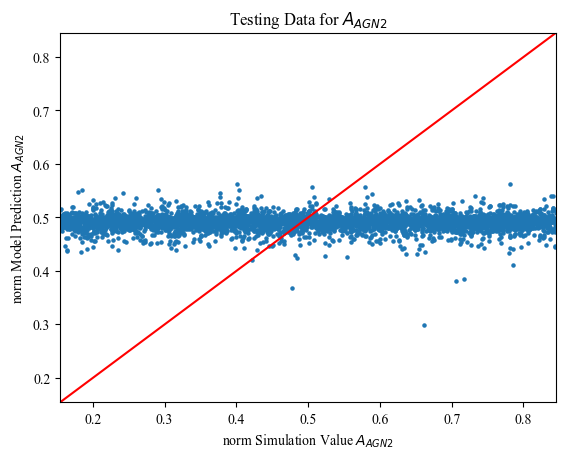

In [93]:
val_predict=model.predict(val_data, verbose=1)
plt.plot([0,1],[0,1],c='r')
plt.scatter(val_label[:,param], val_predict,s=5)
plt.ylim([np.min(test_label[:,param]),np.max(test_label[:,param])])
plt.xlim([np.min(test_label[:,param]),np.max(test_label[:,param])])
plt.ylabel(f'norm Model Prediction ${simpars[param]}$')
plt.xlabel(f'norm Simulation Value ${simpars[param]}$')
plt.title(f'Testing Data for ${simpars[param]}$')

### Testing the training data

1113/1113 [==============================] - 2s 2ms/step


Text(0.5, 1.0, 'Training Data')

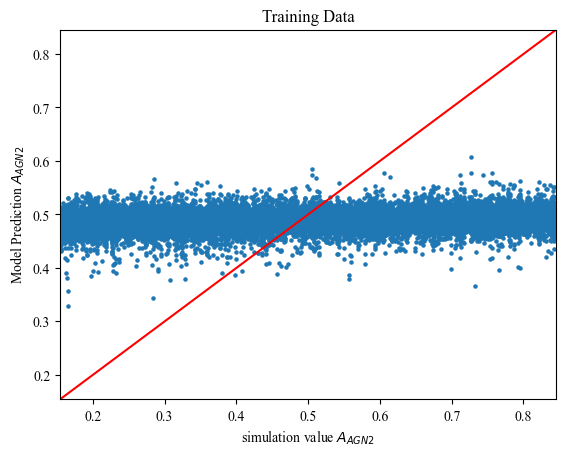

In [94]:
train_predict=model.predict(train_data, verbose=1)
plt.plot([0,1],[0,1],c='r')
plt.scatter(train_label[:,param], train_predict,s=5)
plt.ylim([np.min(test_label[:,param]),np.max(test_label[:,param])])
plt.xlim([np.min(test_label[:,param]),np.max(test_label[:,param])])
plt.ylabel(f'Model Prediction ${simpars[param]}$')
plt.xlabel(f'simulation value ${simpars[param]}$')
plt.title('Training Data')

In [13]:
simpars = ['\Omega_m','\sigma_8','A_{SN1}','A_{SN2}','A_{AGN1}','A_{AGN2}']
lims = [[0.1,0.5],[0.6,1.0],[0.25,4.0],[0.5,2.0],[0.5,2.0],[0.5,2.0]]

test_predict=model.predict(test_data, verbose=1)

pre_predict = (pre_test_predict - 0.5)*5*std_labels[param] + mean_labels[param]
predict = (test_predict - 0.5)*5*std_labels[param] + mean_labels[param]
actual = (test_label[:,param] - 0.5)*5*std_labels[param] + mean_labels[param]

139/139 [==============================] - 0s 2ms/step


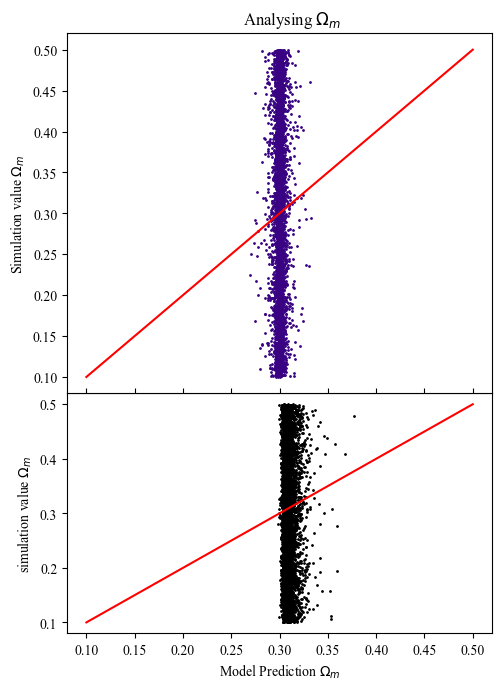

In [14]:
fig = plt.figure(figsize=(5, 8))
fig.suptitle(f"Analysing ${simpars[param]}$")
gs = GridSpec(5, 10, figure=fig)

ax2 = fig.add_subplot(gs[3:5, :10])
ax1 = fig.add_subplot(gs[:3, :10])

ax1.scatter(predict, actual, marker='o', s=1, alpha=1.0, c='xkcd:indigo')
ax1.plot(lims[param],lims[param],c='r')
#ax1.set_xlabel(f'Model Prediction ${simpars[param]}$')
ax1.set_ylabel(f'Simulation value ${simpars[param]}$')
# ax1.set_xlim(lims[param])#+np.array([-0.1,0.1]))
# ax1.set_ylim(lims[param]+np.array([-0.02,0.02]))
ax1.tick_params(axis="x",direction="in",labelbottom=False)

ax2.scatter(pre_predict[:,0], actual, marker='o', s=1, alpha=1.0, c='k')
#ax2.hist2d(pre_predict[:,0], actual, cmap='Purples', norm=colors.LogNorm(), bins=64)
ax2.plot(lims[param],lims[param],c='r')
ax2.set_xlabel(f'Model Prediction ${simpars[param]}$')
ax2.set_ylabel(f'simulation value ${simpars[param]}$')
# ax2.set_xlim(lims[param])#+np.array([-0.1,0.1]))
# ax2.set_ylim(lims[param]+np.array([-0.02,0.02]))


plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.95, 
                    hspace=0.0)  #Ad

In [ ]:
plt.hist2d(pre_predict[:,0], actual, cmap='Purples', norm=colors.LogNorm(), bins=64)
plt.scatter(predict, actual, marker='o', s=1, alpha=1.0, c='xkcd:indigo')
plt.plot(lims[param],lims[param],c='r')
plt.xlabel(f'Model Prediction ${simpars[param]}$')
plt.ylabel(f'parameter value ${simpars[param]}$')
plt.xlim(lims[param])#+np.array([-0.1,0.1]))
plt.ylim(lims[param]+np.array([-0.02,0.02]))

In [29]:
model.evaluate(train_data, train_label[:,param], verbose=0)

0.061427656561136246